<b> PROBLEM </b>

4 yılda bir gerçekleşen bu futbol şöleni tüm dünya tarafından büyük bir ilgiyle takip edilmektedir ve bu turnuvayı izleyen seyircilerin turnuvadan bazı beklentileri olmaktadır. Desteklediği ülkenin şampiyon olması, futbolu futbol yapan anlar, estetik açısından güzel ve atılan bol goller bunlara örnek olarak verilebilir. Seyircilerin bu beklentileri bol gollü geçen maçlardan karşılanabilmektedir. Yıllar içinde format değiştiren dünya kupası gol sayılarında da değişiklik yaşamış mıdır ve ne gibi değişiklik yaşamıştır?

<b> VERİYİ ANLAMAK </b>

Kullandığımız veri kümesi açık kaynak bir veri kümesidir. Kaggle aracılığı ile projemize dahil ettik. Veri kümemiz 21 satır ve 9 sütundan oluşmaktadır. Format değişikliğinden dolayı gol sayılarına etki eden maç sayısı ve takım sayısı gibi etkenler de bulunmaktadır. Bu nedenle "maç başına gol" bizim hedef değişkenimizdir. Yani bu veri setini kullanarak tahmin etmek istediğimiz değerdir.

<b> VERİ SETİNE GENEL BİR BAKIŞ </b>

In [63]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

İlk olarak kullanacağımız kütüphaneleri projemize dahil ettik.

In [64]:
df = pd.read_csv('FIFA - World Cup Summary.csv')

Veri setimizi Visual Studio Code ortamına aktardık.

In [65]:
df.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4


df.head() komutu ile veri kümemizdeki ilk 5 satırı gösterdik.

In [66]:
df.shape

(21, 9)

df.shape komutu ile veri kümemizdeki satır ve sütun sayısını gösterdik.

In [67]:
df.dtypes

YEAR                    int64
HOST                   object
CHAMPION               object
RUNNER UP              object
THIRD PLACE            object
TEAMS                   int64
MATCHES PLAYED          int64
GOALS SCORED            int64
AVG GOALS PER GAME    float64
dtype: object

df.dtypes komutu ile veri setimizde bulunan sütunların hangi türden veriler olduğunu gösterdik.

<b>VERİ TEMİZLEME</b>

In [68]:
nan_fifa = df[df.isna().any(axis = 1)]
nan_fifa

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME


Burada veri setimizde boş bir veri değeri bulunup bulunmadığını kontrol ettik ve herhangi bir boş satır olmadığını gördük.

In [69]:
df.columns

Index(['YEAR', 'HOST', 'CHAMPION', 'RUNNER UP', 'THIRD PLACE', 'TEAMS',
       'MATCHES PLAYED', 'GOALS SCORED', 'AVG GOALS PER GAME'],
      dtype='object')

Veri setimizdeki sütunları yazdırdık. Sütun başlıklarında boşluk olduğunu gördük.

In [70]:
df.columns = df.columns.str.replace(" ","_")

Sütundaki bu boşlukları replace komutu ile " _ " haline getirdik. Böylece veri temizleme işlemini gerçekleştirdik.

In [71]:
df.columns

Index(['YEAR', 'HOST', 'CHAMPION', 'RUNNER_UP', 'THIRD_PLACE', 'TEAMS',
       'MATCHES_PLAYED', 'GOALS_SCORED', 'AVG_GOALS_PER_GAME'],
      dtype='object')

Sütunlarımızı tekrar yazdırarak kontrol ettik.

In [72]:
df.describe()

,YEAR,TEAMS,MATCHES_PLAYED,GOALS_SCORED,AVG_GOALS_PER_GAME
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1976.857143,21.761905,42.761905,121.333333,3.076190
std,26.657618,7.462605,17.615064,33.943090,0.847883
min,1930.000000,13.000000,16.000000,70.000000,2.200000
25%,1958.000000,16.000000,32.000000,89.000000,2.600000
50%,1978.000000,16.000000,38.000000,126.000000,2.700000
75%,1998.000000,32.000000,64.000000,146.000000,3.600000
max,2018.000000,32.000000,64.000000,171.000000,5.400000


Her bir sütundaki verilerin dağılımı hakkında istatistiksel bilgi edinmek için describe() metodunu kullandık.

In [73]:
df.corr()

,YEAR,TEAMS,MATCHES_PLAYED,GOALS_SCORED,AVG_GOALS_PER_GAME
YEAR,1.000000,0.906397,0.973888,0.848767,-0.751623
TEAMS,0.906397,1.000000,0.951589,0.879708,-0.604663
MATCHES_PLAYED,0.973888,0.951589,1.000000,0.887481,-0.745603
GOALS_SCORED,0.848767,0.879708,0.887481,1.000000,-0.386267
AVG_GOALS_PER_GAME,-0.751623,-0.604663,-0.745603,-0.386267,1.000000


Sütun başlıklarımızın kendi içerisindeki bağıntıyı anlayabilmek için korelasyon yaptık. Böylece hangi sütun başlıklarının birbiriyle bağıntılı olduğunu yorumlayabilir hale geldik.

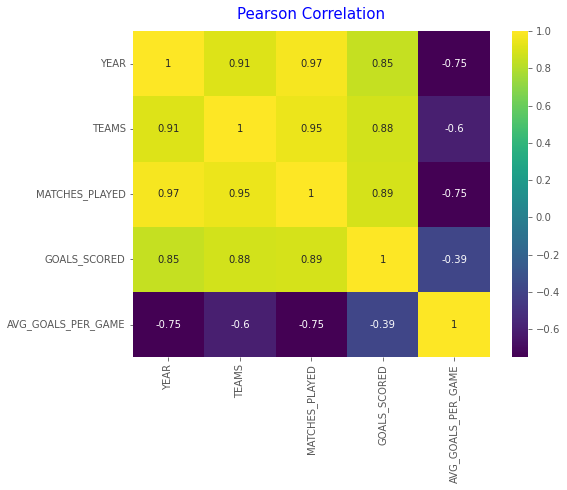

In [74]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.title('Pearson Correlation', fontsize = 15, pad = 12, color = 'b')
plt.show()

Bu bilgiyi heatmap ile görselleştirdik.

In [75]:
pd.pivot_table(df, index = ['YEAR', 'HOST', 'CHAMPION', 'RUNNER_UP', 'THIRD_PLACE'], values = 'GOALS_SCORED', 
              aggfunc = {'GOALS_SCORED' : np.sum}).sort_values('GOALS_SCORED', ascending = False)

,,,,,GOALS_SCORED
YEAR,HOST,CHAMPION,RUNNER_UP,THIRD_PLACE,
2014,Brazil,Germany,Argentina,Netherlands,171
1998,France,France,Brazil,Croatia,171
2018,Russia,France,Croatia,Belgium,169
2002,"South Korea, Japan",Brazil,Germany,Turkey,161
2006,Germany,Italy,France,Germany,147
1982,Spain,Italy,West Germany,Poland,146
2010,South Africa,Spain,Netherlands,Germany,145
1994,United States,Brazil,Italy,Sweden,141
1954,Switzerland,West Germany,Hungary,Austria,140


Şimdiye kadar gerçekleşen dünya kupası turnuvalarında en gollü geçen turnuvadan en az gollü geçen turnuvaya doğru sıraladık. İnişli çıkışlı bir istatistik olacağını öngörüyoruz.

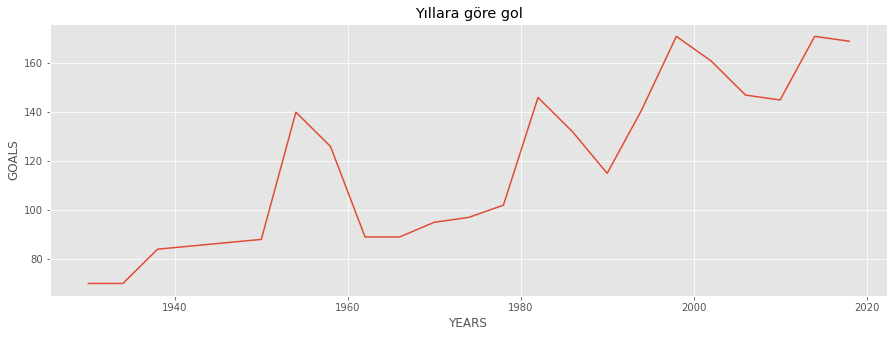

In [76]:
plt.figure(figsize=(15,5))
sns.lineplot(x='YEAR',y='GOALS_SCORED',data=df)
plt.title('Yıllara göre gol')
plt.xlabel('YEARS')
plt.ylabel('GOALS')
plt.show()

Bir önceki satırda yazdırdığımız çıktıyı bu şekilde yorumlamak daha kolay olduğu için çizgi grafiğinde gösterdik. Tahmin ettiğimiz gibi yıllar içinde inişli çıkışlı bir grafik çizmiş olsa da gol sayısında bir artış olduğunu söylemek mümkün diyebiliriz.

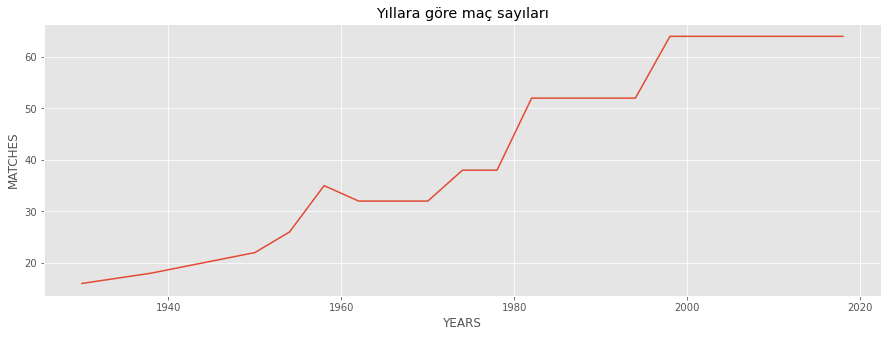

In [77]:
plt.figure(figsize=(15,5))
sns.lineplot(x='YEAR',y='MATCHES_PLAYED',data=df)
plt.title('Yıllara göre maç sayıları')
plt.xlabel('YEARS')
plt.ylabel('MATCHES')
plt.show()

Yıllar içinde turnuvalarda oynanan maç sayılarının çizgi grafiği. Dünya kupası formatı yıllar içinde değiştiği için katılan takım sayısı ve dolayısıyla oynanan maç sayısında da değişim gerçekleşmiştir. Bunu bu çizgi grafiği ile yorumlamak mümkündür. Oynanan maç sayılarında artış bulunmaktadır. Bu artış gol sayılarına doğrudan etki etmektedir. Tahmin ettiğimiz gibi gol sayılarını tek başına yorumlamak mümkün değildir. Bu nedenle bizim hedef değişkenimiz "Ortalama maç başına gol" değeridir.

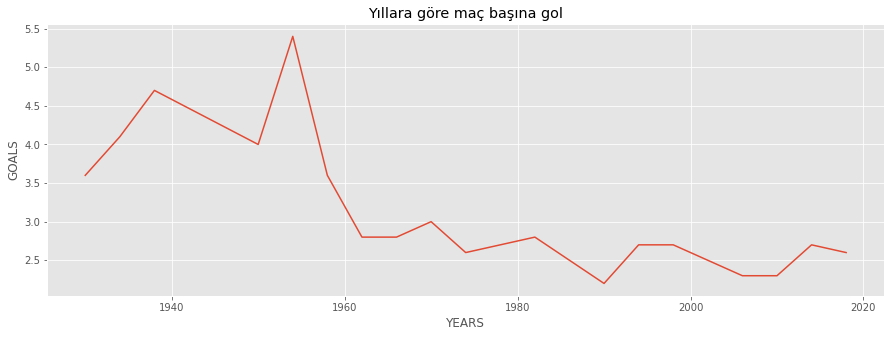

In [78]:
plt.figure(figsize=(15,5))
sns.lineplot(x='YEAR',y='AVG_GOALS_PER_GAME',data=df)
plt.title('Yıllara göre maç başına gol')
plt.xlabel('YEARS')
plt.ylabel('GOALS')
plt.show()

Bir üstteki satırda yorumladığımız gibi gol sayılarında ve oynanan maç sayılarında artış bulunmaktaydı ancak ortalama maç başına gol grafiğini yazdırdığımızda bu grafiğin düşüş yaşadığını yani bir azalma söz konusu olduğunu söyleyebiliriz.

<b> TAHMİN MODELİ OLUŞTURMA </b>

In [79]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,YEAR,TEAMS,MATCHES_PLAYED,GOALS_SCORED,AVG_GOALS_PER_GAME,HOST_Brazil,HOST_Chile,HOST_England,HOST_France,HOST_Germany,...,THIRD_PLACE_France,THIRD_PLACE_Germany,THIRD_PLACE_Italy,THIRD_PLACE_Netherlands,THIRD_PLACE_Poland,THIRD_PLACE_Portugal,THIRD_PLACE_Sweden,THIRD_PLACE_Turkey,THIRD_PLACE_United States,THIRD_PLACE_West Germany
0,1930,13,16,70,3.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1934,16,17,70,4.1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1938,15,18,84,4.7,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1950,13,22,88,4.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1954,16,26,140,5.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Kategoriksel verilerin handle edildiği adım.

In [80]:
X = df.drop('AVG_GOALS_PER_GAME', axis = 1)
y = df['AVG_GOALS_PER_GAME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14, 52)
(14,)
(7, 52)
(7,)


Bir x ve y değişkeni tanımlayıp hedef değişkenimiz olan "AVG_GOALS_PER_GAME"'i diğer değişkenlerin yanından drop metodu ile çıkarıyoruz. Böylece bağımlı değişkenimizin diğer bağımsız değişkenlerle olan ilişkisini tahminlemek için uygun bir ortam yaratıyoruz. Daha sonra bir test yaratıp veriyi bölüyoruz.

In [81]:
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

CPU times: total: 31.2 ms
Wall time: 4.98 ms


0.8567563410860344

Linear Regresyon modeli başarı oranı hesaplama

In [82]:
ridge = Ridge(alpha = 0.5)
%time ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

CPU times: total: 0 ns
Wall time: 3.99 ms


0.8694817686334616

Ridge Regresyon modeli başarı oranı hesaplama

Hangi regresyon modelini kullanacağımıza karar vermek için regresyon türlerinin başarı oranlarını hesaplıyoruz. Ridge Regresyon Modeli daha başarılı olduğu için bu regresyon modelini kullanmayı tercih ediyoruz.

In [83]:
y_pred = ridge.predict(X_test)
print(y_pred)

[3.25651359 1.95175723 2.87980856 4.16260306 2.90062506 2.88036224
 2.85382205]


7 tane tahmin noktası oluşturduk.

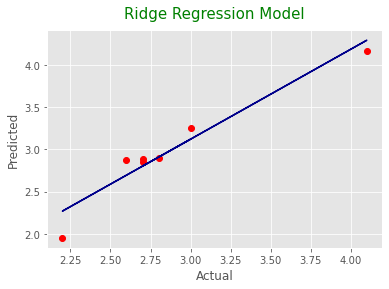

In [84]:
x = y_test
y = y_pred

plt.title('Ridge Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'r')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Bu tahmin modelimizi grafikte gösterdik. Tahmin noktalarımız olan kırmızı noktaların gerçek değerlere olan uzaklığını görebiliyoruz.

<b> HATA PAYI </b>

In [85]:
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error : 0.18313961879927115
Mean Squared Error : 0.03942183314744423
Root Mean Squared Error : 0.19854932169978376


Hata payımızı hesaplıyoruz ve bu oranlar düşük olduğundan iyi bir sonuç elde ettiğimizi varsayıyoruz.

<b> BİR BAŞKA VERİ SETİNE GENEL BAKIŞ </b>

In [86]:
fifa2 = pd.read_csv('fifa2.csv')

Bir başka veri setini projemize dahil ediyoruz.

In [87]:
fifa2.head()

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Points,Win Percentage,Countries,Continents
0,77,13,3,3,7,13,19,10,23.076923,Algeria,Africa
1,23,3,0,2,1,1,2,2,0.000000,Angola,Africa
2,124,81,43,15,23,137,93,120,53.086420,Argentina,South America
3,108,16,2,4,10,13,31,10,12.500000,Australia,Asia
4,78,29,12,4,13,43,47,28,41.379310,Austria,Europe


Yine head() fonksiyonunu kullanarak ilk 5 verimizi yazdırdık.

In [88]:
africa = fifa2.loc[fifa2['Continents']=='Africa'].count()[0]
europe = fifa2.loc[fifa2['Continents']=='Europe'].count()[0]
south_america = fifa2.loc[fifa2['Continents']=='South America'].count()[0]
north_america = fifa2.loc[fifa2['Continents']=='North America'].count()[0]
asia = fifa2.loc[fifa2['Continents']=='Asia'].count()[0]

Kıtaların katılım oranlarını hesaplayabilmek için veri setimizde "Continents" sütununda bulunan kıtaları saydırdık.

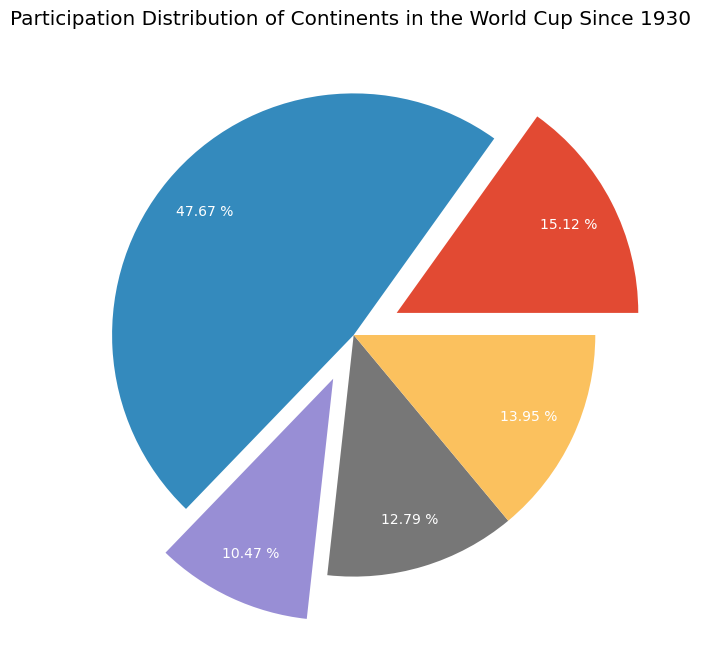

In [89]:
continents = [africa, europe, south_america, north_america, asia]
labels = ['Africa', 'Europe', 'South America', 'North America', 'Asia']
plt.figure(figsize=(8,8), dpi=100)
explode =(.2,0,.2,0,0)
plt.pie(continents,labels=labels,autopct='%.2f %%',pctdistance=0.8,explode=explode, textprops={'color':"w"})
plt.title('Participation Distribution of Continents in the World Cup Since 1930 ')
plt.show()


Saydırdığımız kıtaları pasta grafiği ile yazdırdık. Böylece Dünya Kupasına katılan takımların daha çok hangi kıtada yer aldıklarını gördük.

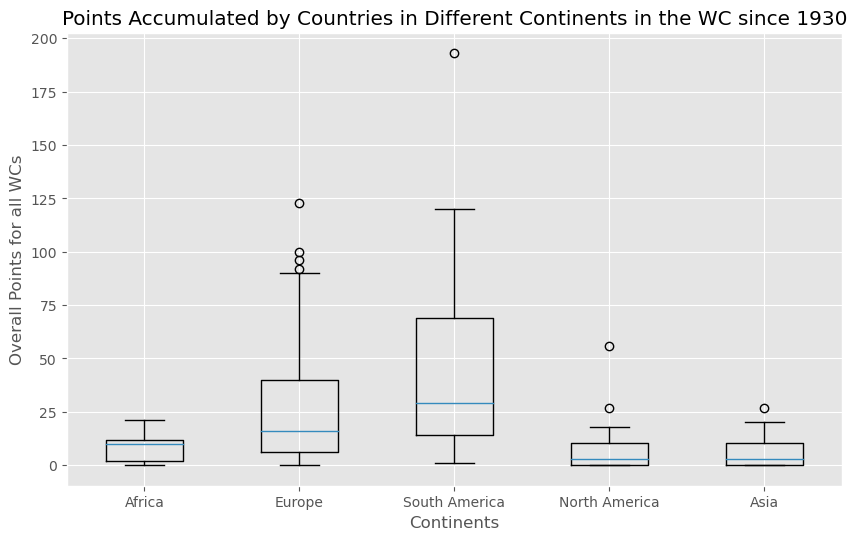

In [90]:
africa = fifa2.loc[fifa2['Continents']=='Africa']['Points']
europe = fifa2.loc[fifa2['Continents']=='Europe']['Points']
south_america = fifa2.loc[fifa2['Continents']=='South America']['Points']
north_america = fifa2.loc[fifa2['Continents']=='North America']['Points']
asia = fifa2.loc[fifa2['Continents']=='Asia']['Points']
labels = ['Africa', 'Europe', 'South America', 'North America', 'Asia']

plt.figure(figsize=(10,6),dpi=100)
plt.style.use('ggplot')
boxes = plt.boxplot([africa,europe,south_america,north_america,asia],labels=labels,)
plt.xlabel('Continents')
plt.ylabel('Overall Points for all WCs')
plt.title('Points Accumulated by Countries in Different Continents in the WC since 1930')
plt.show()

Düşük katılım oranına sahip olmasına rağmen Güney Amerika ülkeleri 1930'dan beri WC'de diğer kıtalara göre daha iyi performans göstermiştir.